## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

In [1]:
! git clone https://www.github.com/ds4e/clustering

Cloning into 'clustering'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 30 (delta 3), reused 1 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 4.21 MiB | 10.67 MiB/s, done.
Resolving deltas: 100% (3/3), done.


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [2]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<Axes: xlabel='x1', ylabel='x2'>

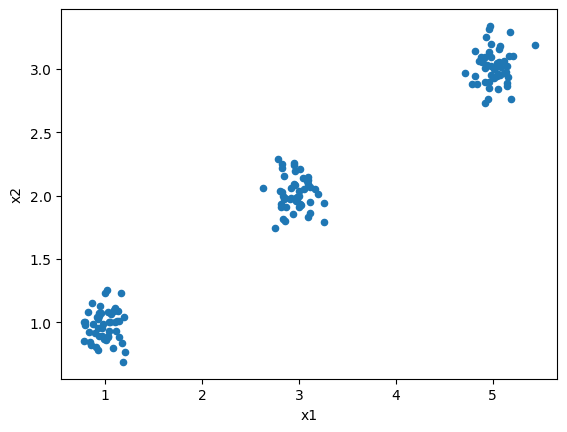

In [5]:
df0_125.plot.scatter(x='x1', y='x2')

<Axes: xlabel='x1', ylabel='x2'>

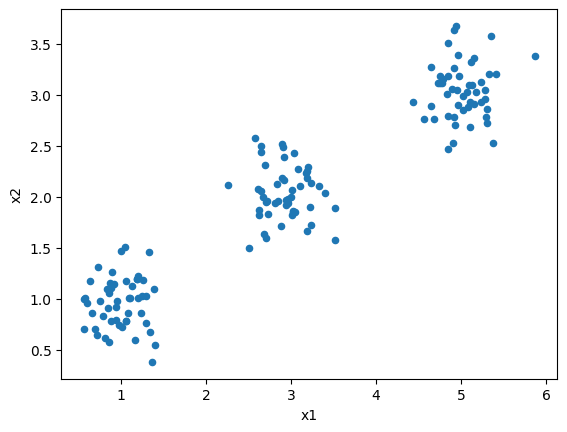

In [6]:
df0_25.plot.scatter(x='x1', y='x2')

<Axes: xlabel='x1', ylabel='x2'>

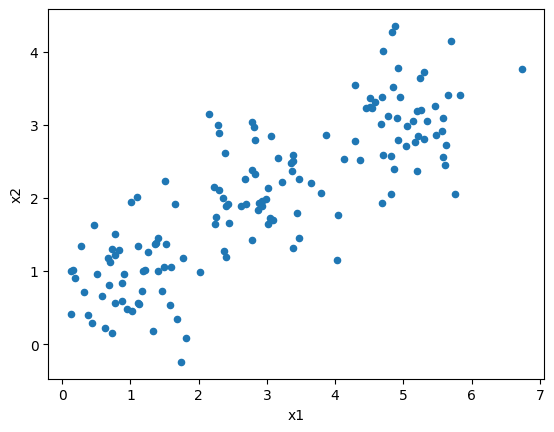

In [7]:
df0_5.plot.scatter(x='x1', y='x2')

<Axes: xlabel='x1', ylabel='x2'>

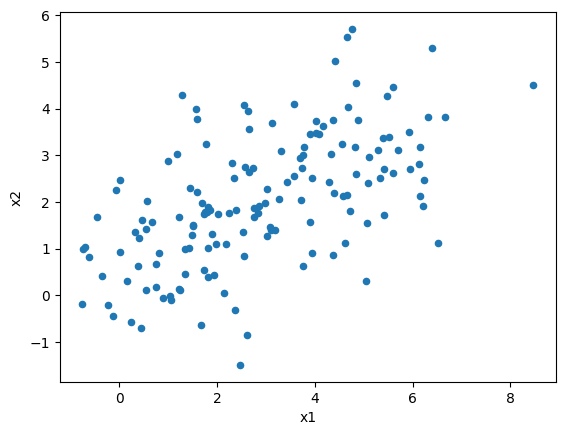

In [8]:
df1_0.plot.scatter(x='x1', y='x2')

<Axes: xlabel='x1', ylabel='x2'>

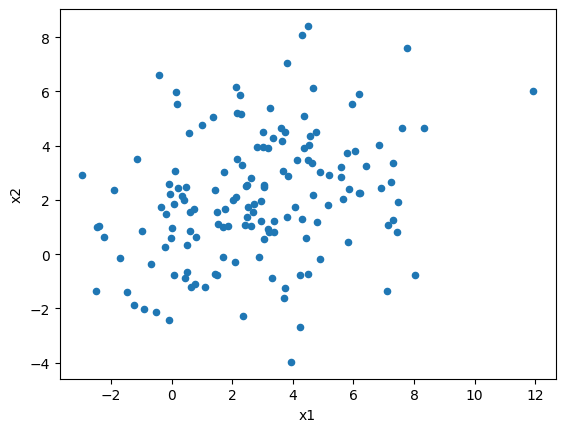

In [9]:
df2_0.plot.scatter(x='x1', y='x2')

As the noise increases, the visual distance of the clusters decreases.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

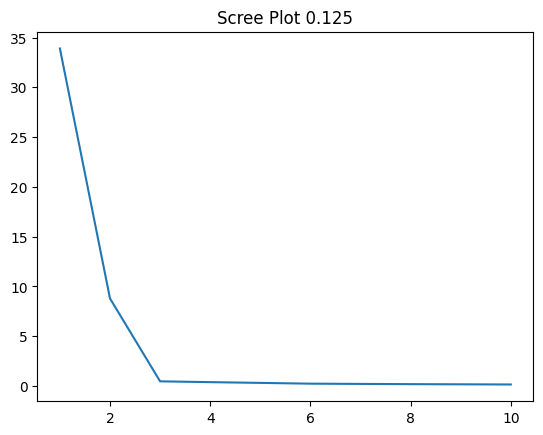

In [12]:
from sklearn.cluster import KMeans # Import kmc
import seaborn as sns

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

X = df0_125.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot 0.125') # Create scree plot

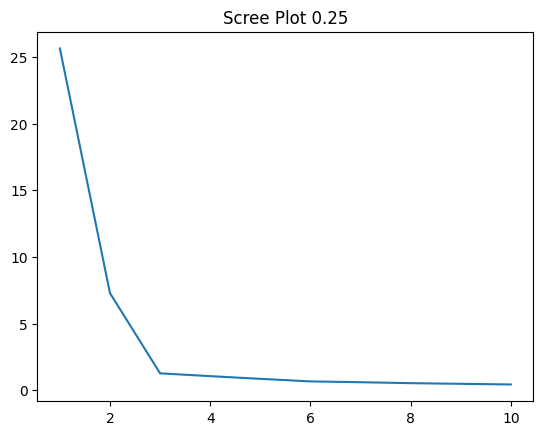

In [13]:
X = df0_25.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot 0.25') # Create scree plot

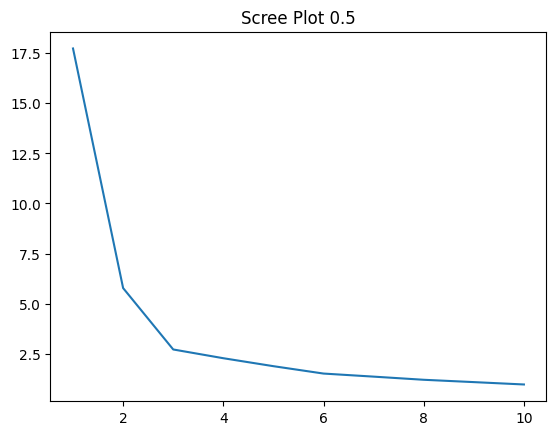

In [14]:
X = df0_5.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot 0.5') # Create scree plot

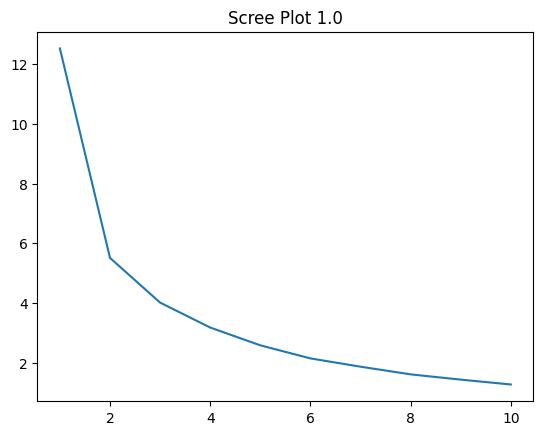

In [15]:
X = df1_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot 1.0') # Create scree plot

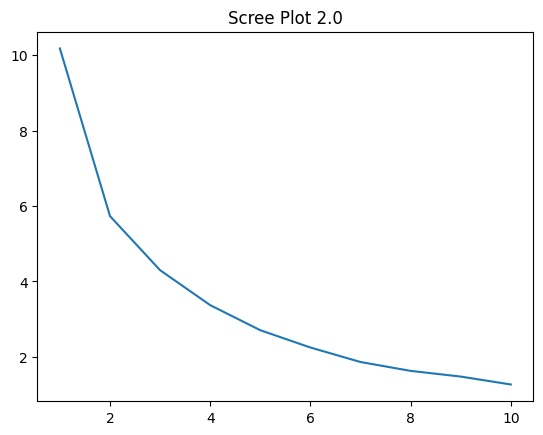

In [16]:
X = df2_0.loc[ : , ['x1','x2'] ] # Select data to cluster
X = X.apply(maxmin)

# Create a scree plot:
k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot 2.0') # Create scree plot

As the noise increases, the elbow on the scree plot becomes harder to distinguish, making it harder to choose a definitive k value.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

We choose a k value at the elbow point because that allows us to balance the amount of error with the amount of clusters that we make. In this example, I would choose a value of 2 for k because that is where the elbow point is located.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?

In [40]:
import os

print(os.getcwd())

new_directory = "/content/clustering/assignment/"
os.chdir(new_directory)

print(os.getcwd())

df = pd.read_csv('./data/SIPRI Military Expenditure Database.csv',low_memory=False)

df_2020 = df[df['Year'] == 2020]
df_2020 = df_2020.dropna(subset=['Spending (2020 USD)', 'Spending per Capita'])
df_2020

/content/clustering/assignment
/content/clustering/assignment


,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
32,32,2020,Afghanistan,279.576955,0.013589,0.049728,7.181899
66,66,2020,Albania,187.433234,0.012583,0.037952,65.126211
100,100,2020,Algeria,9708.277440,0.066600,0.173924,221.392384
134,134,2020,Angola,993.594405,0.014442,0.074624,30.231680
168,168,2020,Argentina,2830.929705,0.007269,0.017268,62.636731
...,...,...,...,...,...,...,...
5506,5506,2020,United Kingdom,60675.039625,0.022408,0.045629,893.778388
5540,5540,2020,United States of America,778397.200000,0.037179,0.081976,2351.631858
5574,5574,2020,Uruguay,1091.535360,0.021777,0.062082,314.201312
5846,5846,2020,Zambia,212.142427,0.011542,0.034261,11.539514


2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?

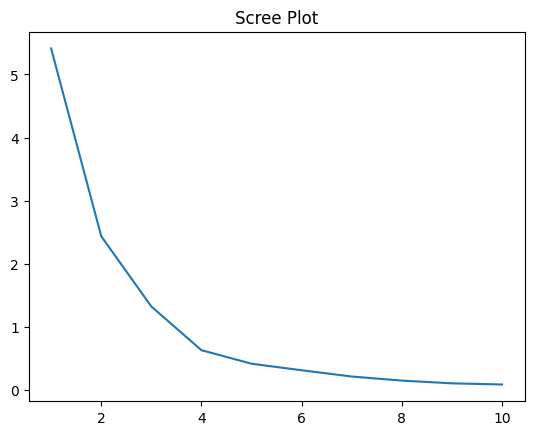

In [43]:
X = df_2020.loc[ : , ['Spending (2020 USD)','Spending per Capita'] ] # Select data to cluster
X = X.apply(maxmin)

k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create

<Axes: title={'center': 'Clustering'}, xlabel='Spending (2020 USD)', ylabel='Spending per Capita'>

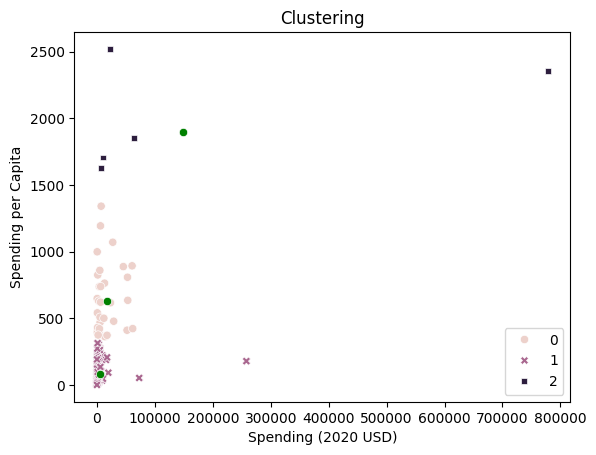

In [49]:
# Create normalizations and add to the dataframe
min_x1 = min(df_2020.loc[:,'Spending (2020 USD)']) # I'm putting these aside to rescale values later
max_x1 = max(df_2020.loc[:,'Spending (2020 USD)'])
min_x2 = min(df_2020.loc[:,'Spending per Capita'])
max_x2 = max(df_2020.loc[:,'Spending per Capita'])

np.random.seed(10)
initial_centroids = np.random.randint(low=1,high=X.shape[0],size=3) # Determine initial centroids
model = KMeans(n_clusters=3, max_iter=9,
               init = X.iloc[initial_centroids,:],random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model
df_2020['g_hat'] = model.predict(X) # Predict values

# Re-normalize the centers, returning them to the scales of the original data, and plot:
centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
this_plot = sns.scatterplot(data=df_2020,x='Spending (2020 USD)',y='Spending per Capita',
                            hue='g_hat',style='g_hat').set_title('Clustering')
sns.scatterplot( x=centroid_x_1, y=centroid_x_2, color='green')

In [50]:
df_2020.groupby('g_hat').describe()

index                                                            \
       count         mean          std     min     25%     50%     75%   
g_hat                                                                    
0       32.0  2860.375000  1638.577388   236.0  1630.0  2939.0  4290.5   
1      111.0  2768.540541  1665.488123    32.0  1205.0  2752.0  4112.0   
2        5.0  4037.200000  1245.393592  2582.0  2922.0  4486.0  4656.0   

                Year          ... Percent of Government Spending            \
          max  count    mean  ...                            75%       max   
g_hat                         ...                                            
0      5506.0   32.0  2020.0  ...                       0.049871  0.180654   
1      5880.0  111.0  2020.0  ...                       0.083508  0.303027   
2      5540.0    5.0  2020.0  ...                       0.116052  0.225050   

      Spending per Capita                                                     \
                    count         mean         std          min          25%   
g_hat                                                                          
0                    32.0   648.719253  258.345684   362.467076   422.655934   
1                   111.0    80.061470   83.501824     0.580129    14.880549   
2                     5.0  2011.461155  400.657404  1625.156250  1705.738706   

                                              
               50%          75%          max  
g_hat                                         
0       618.917652   812.408782  1341.058851  
1        47.056944   125.387558   314.201312  
2      1854.380422  2351.631858  2520.398541  

[3 rows x 48 columns]

In [53]:
df_2020[df['Country'] == 'United States of America']

<ipython-input-53-a21a0ba7648c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2020[df['Country'] == 'United States of America']


,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita,g_hat
5540,5540,2020,United States of America,778397.2,0.037179,0.081976,2351.631858,2


The USA is in Cluster 2, countries that spend a lot on the military

In [55]:
df_2020[df_2020['g_hat'] == 0]

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita,g_hat
236,236,2020,Australia,27300.894701,0.020118,0.044978,1070.623322,0
270,270,2020,Austria,3601.618603,0.008330,0.014533,399.913236,0
338,338,2020,Bahrain,1404.787234,0.040744,0.114776,825.374403,0
440,440,2020,Belgium,5442.835974,0.010451,0.017648,469.614838,0
678,678,2020,Brunei,436.548223,0.040809,0.109474,998.966186,0
882,882,2020,Canada,23281.319911,0.014159,0.026804,616.854430,0
1324,1324,2020,Cyprus,483.415023,0.020535,0.043645,400.509547,0
1426,1426,2020,Denmark,4980.428135,0.013982,0.026010,859.880548,0
1698,1698,2020,Estonia,718.112390,0.023638,0.051496,541.154778,0
1834,1834,2020,Finland,4087.541320,0.015305,0.026642,737.690186,0


In [56]:
df_2020[df_2020['g_hat'] == 1]

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita,g_hat
32,32,2020,Afghanistan,279.576955,0.013589,0.049728,7.181899,1
66,66,2020,Albania,187.433234,0.012583,0.037952,65.126211,1
100,100,2020,Algeria,9708.277440,0.066600,0.173924,221.392384,1
134,134,2020,Angola,993.594405,0.014442,0.074624,30.231680,1
168,168,2020,Argentina,2830.929705,0.007269,0.017268,62.636731,1
...,...,...,...,...,...,...,...,...
5404,5404,2020,Uganda,984.759732,0.025971,0.121301,21.529038,1
5438,5438,2020,Ukraine,5924.200880,0.038118,0.082884,135.459845,1
5574,5574,2020,Uruguay,1091.535360,0.021777,0.062082,314.201312,1
5846,5846,2020,Zambia,212.142427,0.011542,0.034261,11.539514,1


In [57]:
df_2020[df_2020['g_hat'] == 2]

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita,g_hat
2582,2582,2020,Israel,21816.569767,0.053553,0.116052,2520.398541,2
2922,2922,2020,Kuwait,6941.042345,0.064961,0.097882,1625.156250,2
4486,4486,2020,Saudi Arabia,64558.400000,0.092211,0.225050,1854.380422,2
4656,4656,2020,Singapore,9978.571429,0.029429,0.110489,1705.738706,2
5540,5540,2020,United States of America,778397.200000,0.037179,0.081976,2351.631858,2


There are some patterns in cluster membership. For example, Cluster 2 appears to be countries with large militiaries like the United States or countries in the midst of war like Israel. Countries in Cluster 0 appear to be dominated by Western nations. Cluster 1 appears to be made up of mostly Asian, African, and South American nations.

3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?

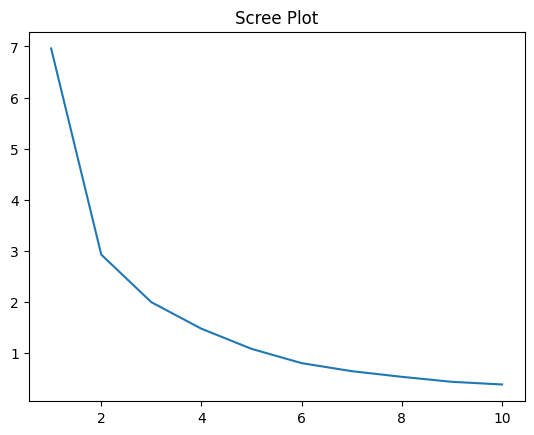

In [59]:
X = df_2020.loc[ : , ['Percent of Government Spending','Percent of GDP'] ] # Select data to cluster
X = X.apply(maxmin)

k_bar = 10
SSE = [] # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the model
    SSE.append(model.inertia_) # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=np.arange(1,k_bar+1), y=SSE).set_title('Scree Plot') # Create

<Axes: title={'center': 'Clustering'}, xlabel='Percent of Government Spending', ylabel='Percent of GDP'>

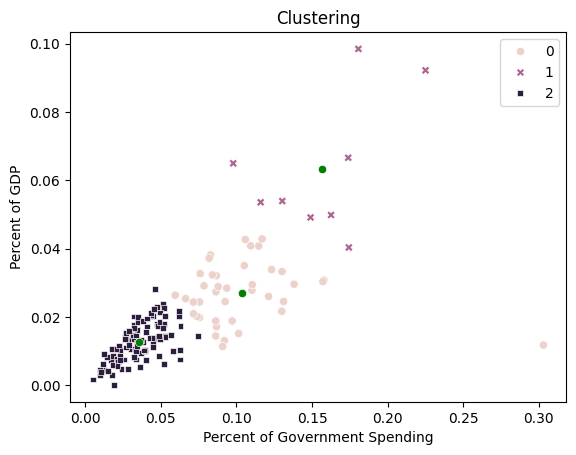

In [60]:
# Create normalizations and add to the dataframe
min_x1 = min(df_2020.loc[:,'Percent of Government Spending']) # I'm putting these aside to rescale values later
max_x1 = max(df_2020.loc[:,'Percent of Government Spending'])
min_x2 = min(df_2020.loc[:,'Percent of GDP'])
max_x2 = max(df_2020.loc[:,'Percent of GDP'])

np.random.seed(10)
initial_centroids = np.random.randint(low=1,high=X.shape[0],size=3) # Determine initial centroids
model = KMeans(n_clusters=3, max_iter=9,
               init = X.iloc[initial_centroids,:],random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model
df_2020['g_hat'] = model.predict(X) # Predict values

# Re-normalize the centers, returning them to the scales of the original data, and plot:
centers = model.cluster_centers_ # Get the computed centers for the kmc model
centroid_x_1 = centers[:,0]*(max_x1-min_x1)+min_x1
centroid_x_2 = centers[:,1]*(max_x2-min_x2)+min_x2
this_plot = sns.scatterplot(data=df_2020,x='Percent of Government Spending',y='Percent of GDP',
                            hue='g_hat',style='g_hat').set_title('Clustering')
sns.scatterplot( x=centroid_x_1, y=centroid_x_2, color='green')

In [61]:
df_2020.groupby('g_hat').describe()

index                                                                   \
      count         mean          std    min     25%     50%     75%     max   
g_hat                                                                          
0      40.0  2832.750000  1809.733948  338.0  1009.5  2684.0  4698.5  5540.0   
1       9.0  2381.777778  1760.254937  100.0   304.0  2718.0  4044.0  4486.0   
2      99.0  2871.515152  1590.144034   32.0  1647.0  2956.0  4197.0  5880.0   

       Year          ... Percent of Government Spending            \
      count    mean  ...                            75%       max   
g_hat                ...                                            
0      40.0  2020.0  ...                       0.115330  0.303027   
1       9.0  2020.0  ...                       0.174362  0.225050   
2      99.0  2020.0  ...                       0.047402  0.074624   

      Spending per Capita                                                 \
                    count        mean         std        min         25%   
g_hat                                                                      
0                    40.0  266.354677  479.599021   5.674383   26.140347   
1                     9.0  899.794659  919.007265  47.056944  213.958961   
2                    99.0  211.624304  278.496227   0.580129   16.487333   

                                             
              50%          75%          max  
g_hat                                        
0      106.828852   208.472881  2351.631858  
1      221.392384  1625.156250  2520.398541  
2       72.164472   367.649743  1341.058851  

[3 rows x 48 columns]

In [63]:
cluster0 = df_2020[df_2020['g_hat'] == 0]
cluster0['Country'].unique()

array(['Bahrain', 'Bangladesh', 'Belarus', 'Botswana', 'Brunei',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Central African Republic',
       'Chad', 'Chile', 'Colombia', 'Congo, Republic', 'Ecuador',
       'Equatorial Guinea', 'Gabon', 'Guinea', 'India', 'Iran', 'Iraq',
       'Korea, South', 'Lebanon', 'Mali', 'Mauritania', 'Morocco',
       'Myanmar', 'Namibia', 'Niger', 'Russia', 'Singapore',
       'South Sudan', 'Sri Lanka', 'Sudan', 'Taiwan', 'Togo', 'Tunisia',
       'Turkey', 'Uganda', 'Ukraine', 'United States of America'],
      dtype=object)

In [64]:
cluster1 = df_2020[df_2020['g_hat'] == 1]
cluster1['Country'].unique()

array(['Algeria', 'Armenia', 'Azerbaijan', 'Israel', 'Jordan', 'Kuwait',
       'Oman', 'Pakistan', 'Saudi Arabia'], dtype=object)

In [65]:
cluster2 = df_2020[df_2020['g_hat'] == 2]
cluster2['Country'].unique()

array(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cameroon',
       'Canada', 'Cape Verde', 'China', 'Congo, DR', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Dominican Republic', 'Egypt', 'El Salvador',
       'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gambia, The',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary',
       'Indonesia', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan',
       'Kenya', 'Kosovo', 'Kyrgyz Republic', 'Latvia', 'Lesotho',
       'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi',
       'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia',
       'Montenegro', 'Mozambique', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Nigeria', 'North Macedonia', 'Norway',
       'Papua New Guinea', 'Paraguay',

There are some similarities between this clustering to the clustering in part 2. For example, in both clusters, the United States remains a far lying outlier. However, some differences is that we can see that the USA only spends a small percent of its GDP on the military because it has a massive GDP. Countries like Algeria and Armenia, which are in cluster 1, spend a larger percent of their GDP on the military than the USA because their GDPs are not as large.

4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?